<a href="https://colab.research.google.com/github/vidhi-01/Market-Anomaly-Detection/blob/main/Market_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import joblib

In [ ]:
original_data_file_path = '/content/original_data.csv'

original_data = pd.read_csv(original_data_file_path)

original_data.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [ ]:
X = original_data.drop(columns=['Y','Data'], axis=1)
y = original_data['Y']
X.head()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,6.671,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,6.747,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,6.634,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,6.423,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,6.231,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


## Preprocessing

In [ ]:
original_data.isnull().sum()

,0
Y,0
Data,0
XAU BGNL,0
ECSURPUS,0
BDIY,0
CRY,0
DXY,0
JPY,0
GBP,0
Cl1,0


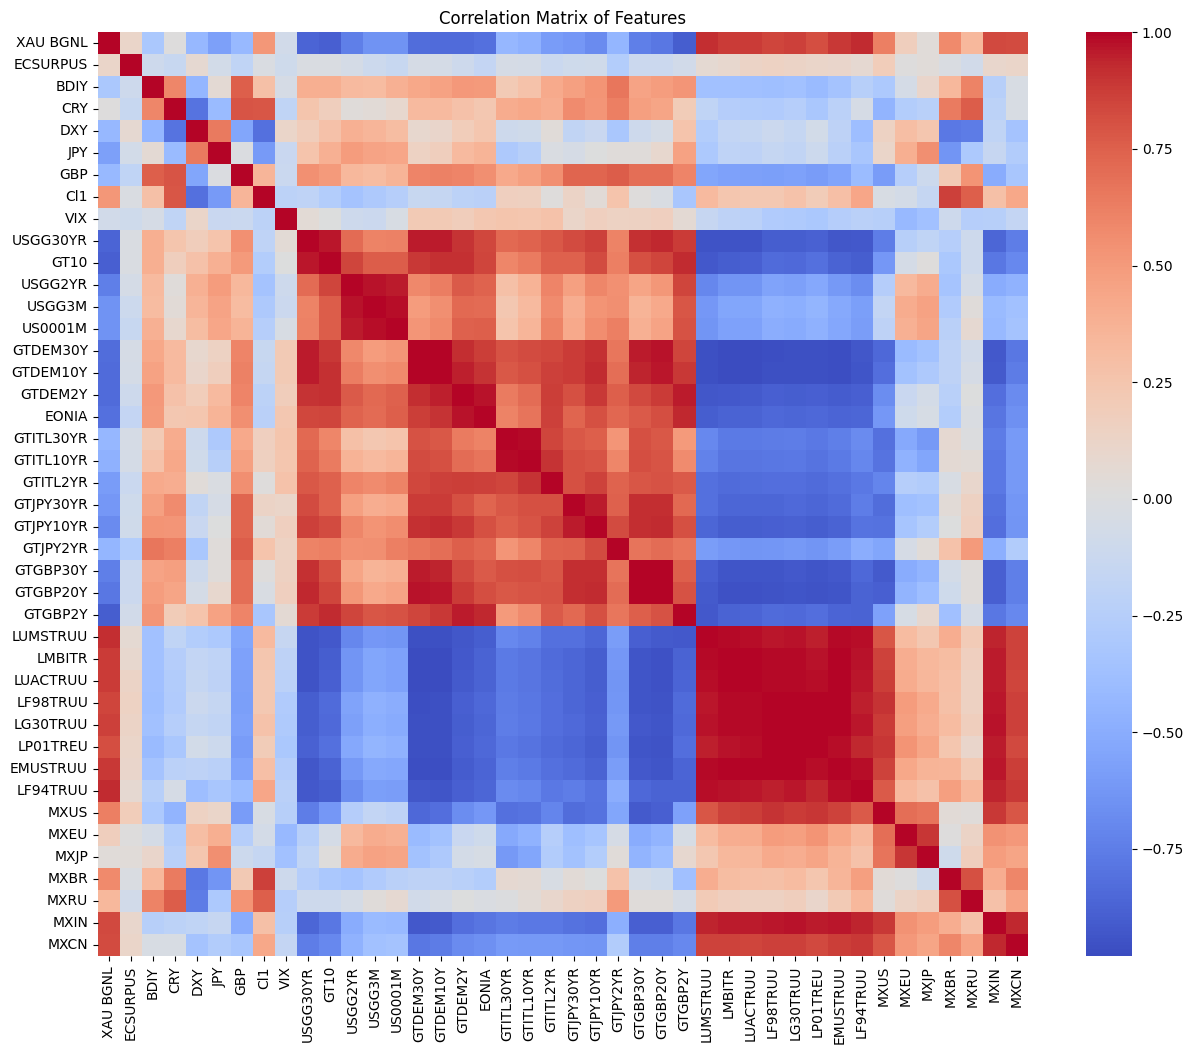

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
XAU BGNL,1.000000,0.114798,-0.315007,0.015316,-0.428891,-0.576191,-0.422084,0.515215,-0.075873,-0.868696,...,0.817990,0.891486,0.925465,0.625814,0.176177,0.036654,0.581667,0.339929,0.831756,0.829659
ECSURPUS,0.114798,1.000000,-0.102022,-0.139779,0.074835,-0.070422,-0.188233,-0.016245,-0.094127,-0.015927,...,0.115747,0.110335,0.073268,0.192180,0.014535,0.034829,-0.014098,-0.077750,0.102198,0.115145
BDIY,-0.315007,-0.102022,1.000000,0.596182,-0.441793,0.062822,0.756718,0.286396,-0.045367,0.390852,...,-0.410941,-0.350372,-0.241704,-0.300277,-0.058349,0.103124,0.337489,0.606526,-0.240799,-0.033084
CRY,0.015316,-0.139779,0.596182,1.000000,-0.798564,-0.412364,0.793954,0.785614,-0.190060,0.256228,...,-0.315491,-0.218547,-0.045101,-0.458623,-0.261605,-0.235202,0.641511,0.761661,-0.210901,-0.031605
DXY,-0.428891,0.074835,-0.441793,-0.798564,1.000000,0.650429,-0.544966,-0.816378,0.115712,0.187296,...,-0.074069,-0.201703,-0.386866,0.144988,0.300674,0.247446,-0.776353,-0.756141,-0.188670,-0.352379
JPY,-0.576191,-0.070422,0.062822,-0.412364,0.650429,1.000000,-0.008633,-0.608209,-0.134791,0.260793,...,-0.113902,-0.225936,-0.330176,0.115772,0.392934,0.557078,-0.639573,-0.306819,-0.149469,-0.269353
GBP,-0.422084,-0.188233,0.756718,0.793954,-0.544966,-0.008633,1.000000,0.352787,-0.124496,0.547876,...,-0.598572,-0.549016,-0.402361,-0.594595,-0.246342,-0.113736,0.224720,0.530964,-0.501925,-0.329350
Cl1,0.515215,-0.016245,0.286396,0.785614,-0.816378,-0.608209,0.352787,1.000000,-0.213999,-0.194274,...,0.196312,0.292426,0.438823,-0.029697,-0.062125,-0.160278,0.861036,0.759998,0.284056,0.430908
VIX,-0.075873,-0.094127,-0.045367,-0.190060,0.115712,-0.134791,-0.124496,-0.213999,1.000000,0.049333,...,-0.310635,-0.253247,-0.227376,-0.239029,-0.421996,-0.367709,-0.098962,-0.247953,-0.243126,-0.164591
USGG30YR,-0.868696,-0.015927,0.390852,0.256228,0.187296,0.260793,0.547876,-0.194274,0.049333,1.000000,...,-0.881795,-0.926959,-0.924378,-0.748806,-0.238910,-0.186228,-0.251483,-0.102530,-0.856734,-0.753662


In [ ]:
correlation_matrix = X.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

correlation_matrix

In [ ]:
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(X)
X = pd.DataFrame(normalized_features, columns=X.columns)
X.head()

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0.015181,0.534860,0.095375,0.141075,0.602813,0.509797,0.519168,0.120342,0.196600,0.986390,...,0.101686,0.000000,0.008764,0.222612,0.793096,0.717552,0.129763,0.049837,0.064738,0.180059
1,0.017695,0.517557,0.096853,0.162526,0.629622,0.503152,0.510405,0.143861,0.181558,1.000000,...,0.103975,0.000805,0.008764,0.226361,0.812521,0.721905,0.145179,0.056683,0.070758,0.166580
2,0.017409,0.564377,0.093636,0.168699,0.640964,0.512864,0.523549,0.139508,0.204422,0.979764,...,0.106051,0.001764,0.008764,0.213680,0.778999,0.697318,0.136557,0.044715,0.074417,0.164161
3,0.014895,0.592875,0.088680,0.167619,0.692726,0.543704,0.480832,0.139050,0.210890,0.941977,...,0.113221,0.001340,0.003594,0.213497,0.809080,0.738775,0.126575,0.034534,0.077186,0.154052
4,0.023837,0.654453,0.085724,0.163689,0.678291,0.568410,0.480832,0.137523,0.177798,0.907593,...,0.108320,0.006900,0.003594,0.221379,0.869908,0.774032,0.149667,0.045520,0.089881,0.154311


In [ ]:
def build_models(strategy_features, path):
  X_stra = X[strategy_features]
  y_stra = y

  X_train, X_test, y_train, y_test = train_test_split(X_stra, y_stra, test_size=0.2, random_state=42, stratify=y_stra)

  # smote = SMOTE(random_state=42)
  # X_train, y_train = smote.fit_resample(X_train, y_train)

  # Model 1: Isolation Forest
  iso_forest = IsolationForest(n_estimators=500, contamination=0.2, random_state=42, max_samples="auto")
  iso_forest.fit(X_train)

  anomaly_scores = iso_forest.decision_function(X_train)

  plt.figure(figsize=(10, 6))
  plt.hist(anomaly_scores, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
  plt.title('Distribution of Anomaly Scores')
  plt.xlabel('Anomaly Score')
  plt.ylabel('Frequency')
  plt.legend()
  plt.grid(True)
  plt.show()

  y_pred_train_if = iso_forest.predict(X_train)
  y_pred_test_if = iso_forest.predict(X_test)

  y_pred_train_if_binary = (y_pred_train_if == -1).astype(int)
  y_pred_test_if_binary = (y_pred_test_if == -1).astype(int)

  if_train_report = classification_report(y_train, y_pred_train_if_binary, target_names=["Normal", "Crash"])
  if_test_report = classification_report(y_test, y_pred_test_if_binary, target_names=["Normal", "Crash"])

  print("#1 Isolation Forest")
  print(if_train_report, if_test_report)

  joblib.dump(iso_forest, f'/content/isolation_forest_model_{path}.pkl')

  # Model 2: Logistic Regression
  log_reg = LogisticRegression(random_state=42)
  log_reg.fit(X_train, y_train)

  y_pred_train_lr = log_reg.predict(X_train)
  y_pred_test_lr = log_reg.predict(X_test)

  lr_train_report = classification_report(y_train, y_pred_train_lr, target_names=["Normal", "Crash"])
  lr_test_report = classification_report(y_test, y_pred_test_lr, target_names=["Normal", "Crash"])

  print("#2 Logistic Regression")
  print(lr_train_report, lr_test_report)

  joblib.dump(log_reg, f'/content/logistic_regression_model_{path}.pkl')

  # Model 3: Neural Network
  mlp = MLPClassifier(hidden_layer_sizes=(16,), max_iter=500, random_state=42)
  mlp.fit(X_train, y_train)

  y_pred_train_nn = mlp.predict(X_train)
  y_pred_test_nn = mlp.predict(X_test)

  nn_train_report = classification_report(y_train, y_pred_train_nn, target_names=["Normal", "Crash"])
  nn_test_report = classification_report(y_test, y_pred_test_nn, target_names=["Normal", "Crash"])

  print("#3 Neural Network")
  print(nn_train_report, nn_test_report)
  joblib.dump(mlp, f'/content/neural_network_model_{path}.pkl')

1. **Volatility Indicators VIX (Volatility Index)**: Known as the "fear index," this measures market expectations of near-term volatility. A rising VIX often signals uncertainty or fear in the market, which can precede crashes.
* Volatility: VIX, BDIY



In [ ]:
volatility_features = ['VIX', 'BDIY']
X_volatility = X[volatility_features]
y_volatility = y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_volatility, y_volatility, test_size=0.2, random_state=42, stratify=y_volatility)

In [ ]:
# Model 1: Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
anomaly_scores = iso_forest.decision_function(X_train)
anomaly_scores

array([ 0.1508898 ,  0.06366177,  0.13828625, -0.06256854,  0.02868356,
        0.15483278,  0.15761119,  0.15073984,  0.11539692,  0.02420788,
        0.02924882,  0.15641068,  0.15153885,  0.16707429, -0.0027975 ,
        0.04893549,  0.07273985, -0.0669252 ,  0.14685722,  0.1328776 ,
        0.0814005 ,  0.15388191,  0.11735256,  0.05379525, -0.08887983,
        0.03115159, -0.09680131,  0.13234388,  0.15427315,  0.12557223,
        0.03586892,  0.12872343,  0.16500832,  0.14687396,  0.04916446,
        0.14735221,  0.08463513,  0.1646401 , -0.02051117,  0.12426894,
        0.09671675,  0.15173875,  0.15734503,  0.15336803,  0.03660308,
        0.13295865,  0.14045965,  0.06950276,  0.08121577,  0.14067527,
        0.11965691,  0.16400258,  0.15312421, -0.08388874,  0.06809581,
        0.14075522,  0.12708054,  0.15269346,  0.15686209,  0.16074629,
        0.00023066, -0.02296143,  0.13010502,  0.139275  ,  0.0665224 ,
        0.02572459,  0.0801674 ,  0.08468715,  0.11527193,  0.12

<ipython-input-70-5ae7c7f3110a>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


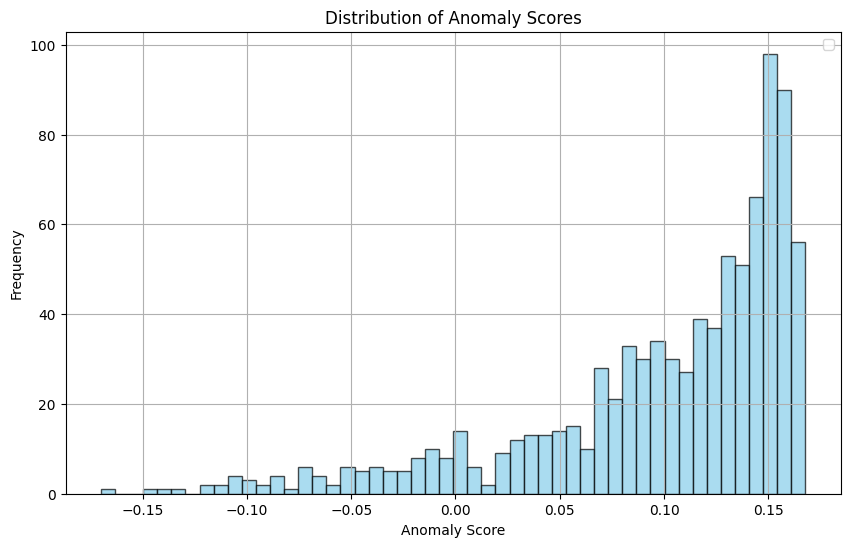

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred_train_if = iso_forest.predict(X_train)
y_pred_test_if = iso_forest.predict(X_test)

In [ ]:
y_pred_train_if_binary = (y_pred_train_if == -1).astype(int)
y_pred_test_if_binary = (y_pred_test_if == -1).astype(int)

In [ ]:
# Evaluate Isolation Forest
if_train_report = classification_report(y_train, y_pred_train_if_binary, target_names=["Normal", "Crash"])
if_test_report = classification_report(y_test, y_pred_test_if_binary, target_names=["Normal", "Crash"])

In [ ]:
print(if_train_report)

              precision    recall  f1-score   support

      Normal       0.82      0.94      0.87       699
       Crash       0.49      0.23      0.32       189

    accuracy                           0.79       888
   macro avg       0.66      0.58      0.59       888
weighted avg       0.75      0.79      0.75       888



In [ ]:
print(if_test_report)

              precision    recall  f1-score   support

      Normal       0.82      0.97      0.89       175
       Crash       0.67      0.25      0.36        48

    accuracy                           0.81       223
   macro avg       0.75      0.61      0.63       223
weighted avg       0.79      0.81      0.78       223



In [ ]:
# Model 2: Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predict and evaluate Logistic Regression
y_pred_train_lr = log_reg.predict(X_train)
y_pred_test_lr = log_reg.predict(X_test)

In [ ]:
lr_train_report = classification_report(y_train, y_pred_train_lr, target_names=["Normal", "Crash"])
lr_test_report = classification_report(y_test, y_pred_test_lr, target_names=["Normal", "Crash"])

In [ ]:
print(lr_train_report, lr_test_report)

              precision    recall  f1-score   support

      Normal       0.85      1.00      0.92       699
       Crash       0.97      0.35      0.51       189

    accuracy                           0.86       888
   macro avg       0.91      0.67      0.72       888
weighted avg       0.88      0.86      0.83       888
               precision    recall  f1-score   support

      Normal       0.86      0.99      0.92       175
       Crash       0.95      0.40      0.56        48

    accuracy                           0.87       223
   macro avg       0.90      0.70      0.74       223
weighted avg       0.88      0.87      0.84       223



In [ ]:
# Model 3: Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(16,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16,), max_iter=500, random_state=42)

In [ ]:
# Predict and evaluate Neural Network
y_pred_train_nn = mlp.predict(X_train)
y_pred_test_nn = mlp.predict(X_test)

In [ ]:
nn_train_report = classification_report(y_train, y_pred_train_nn, target_names=["Normal", "Crash"])
nn_test_report = classification_report(y_test, y_pred_test_nn, target_names=["Normal", "Crash"])

In [ ]:
print(nn_train_report, nn_test_report)

              precision    recall  f1-score   support

      Normal       0.87      0.96      0.91       699
       Crash       0.77      0.46      0.58       189

    accuracy                           0.86       888
   macro avg       0.82      0.71      0.74       888
weighted avg       0.85      0.86      0.84       888
               precision    recall  f1-score   support

      Normal       0.87      0.96      0.91       175
       Crash       0.76      0.46      0.57        48

    accuracy                           0.85       223
   macro avg       0.81      0.71      0.74       223
weighted avg       0.84      0.85      0.84       223



<ipython-input-124-6bfe661f0768>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


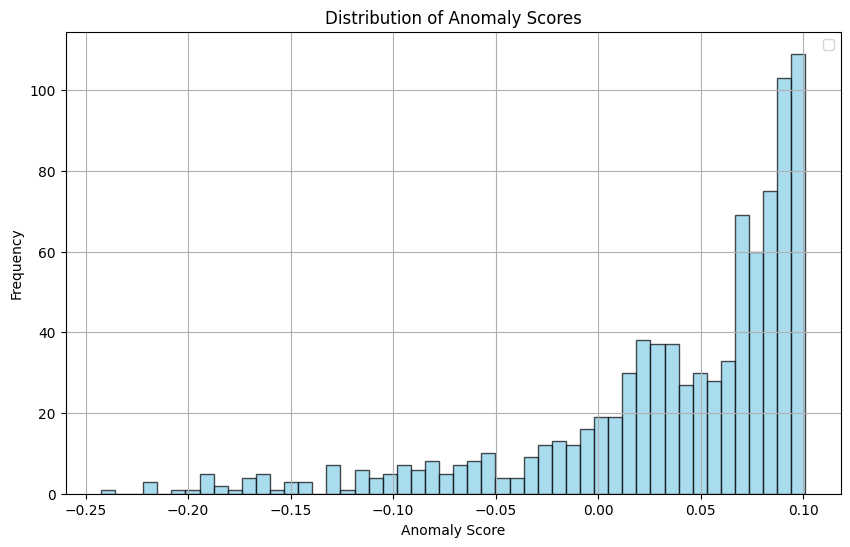

#1 Isolation Forest
              precision    recall  f1-score   support

      Normal       0.84      0.85      0.85       699
       Crash       0.42      0.40      0.41       189

    accuracy                           0.76       888
   macro avg       0.63      0.62      0.63       888
weighted avg       0.75      0.76      0.75       888
               precision    recall  f1-score   support

      Normal       0.85      0.90      0.88       175
       Crash       0.54      0.42      0.47        48

    accuracy                           0.80       223
   macro avg       0.70      0.66      0.67       223
weighted avg       0.78      0.80      0.79       223

#2 Logistic Regression
              precision    recall  f1-score   support

      Normal       0.85      1.00      0.92       699
       Crash       0.97      0.35      0.51       189

    accuracy                           0.86       888
   macro avg       0.91      0.67      0.72       888
weighted avg       0.88      0.

In [ ]:
build_models(['VIX', 'BDIY'],"Volatility Indicators")

2. **Economic Sentiment and Rates Interest Rates (USGG30YR, USGG10YR, etc.):** Sudden spikes or unusual behavior in long- and short-term interest rates can indicate liquidity problems.
EONIA (Euro Overnight Index Average): Useful for assessing interbank lending risk in Europe, reflecting systemic risks.
Credit Spreads (LUMSTRUU, LUACTRUU, etc.): Spreads widening can indicate market stress or tightening financial conditions.
* Interest Rates : USGG30YR, USGG10YR, USGG3M, EONIA

<ipython-input-124-6bfe661f0768>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


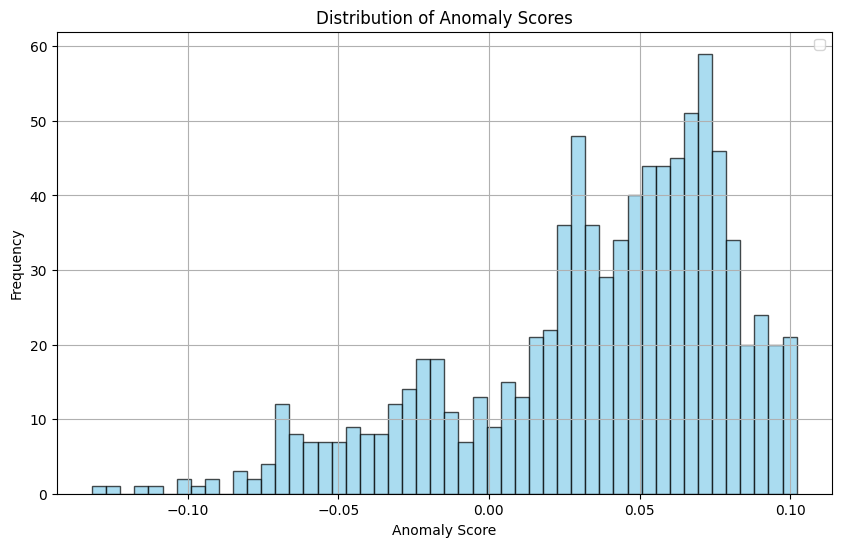

#1 Isolation Forest
              precision    recall  f1-score   support

      Normal       0.83      0.84      0.84       699
       Crash       0.38      0.36      0.37       189

    accuracy                           0.74       888
   macro avg       0.61      0.60      0.60       888
weighted avg       0.73      0.74      0.74       888
               precision    recall  f1-score   support

      Normal       0.87      0.85      0.86       175
       Crash       0.49      0.52      0.51        48

    accuracy                           0.78       223
   macro avg       0.68      0.69      0.68       223
weighted avg       0.79      0.78      0.78       223

#2 Logistic Regression
              precision    recall  f1-score   support

      Normal       0.80      1.00      0.89       699
       Crash       0.85      0.09      0.16       189

    accuracy                           0.80       888
   macro avg       0.83      0.54      0.53       888
weighted avg       0.81      0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
build_models(['USGG30YR','USGG3M', 'EONIA', 'LUMSTRUU', 'LUACTRUU'],"Economic Sentiment")

3. **Equity Market Indicators Regional Market Indices (MXUS, MXEU, MXJP, etc.):** Price movements in major indices can signal regional risks or global contagion.
Sector-Specific Indices (e.g., CRY - Commodity Index): Movements in sector indices like commodities or transportation (BDIY) often provide early warnings.
* Equity Indices : MXUS, MXEU, MXJP, MXBR, MXCN

<ipython-input-124-6bfe661f0768>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


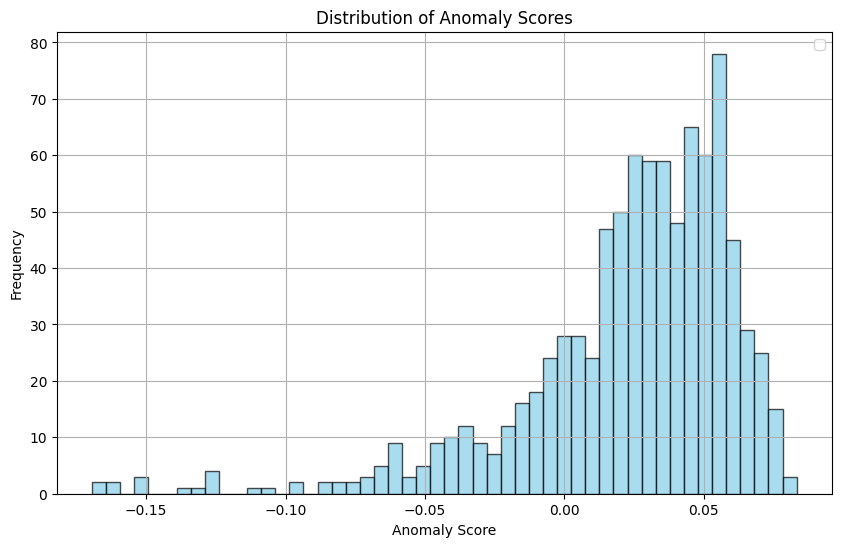

#1 Isolation Forest
              precision    recall  f1-score   support

      Normal       0.84      0.85      0.85       699
       Crash       0.43      0.40      0.41       189

    accuracy                           0.76       888
   macro avg       0.63      0.63      0.63       888
weighted avg       0.75      0.76      0.76       888
               precision    recall  f1-score   support

      Normal       0.85      0.87      0.86       175
       Crash       0.49      0.44      0.46        48

    accuracy                           0.78       223
   macro avg       0.67      0.66      0.66       223
weighted avg       0.77      0.78      0.78       223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#2 Logistic Regression
              precision    recall  f1-score   support

      Normal       0.79      1.00      0.88       699
       Crash       1.00      0.02      0.03       189

    accuracy                           0.79       888
   macro avg       0.89      0.51      0.46       888
weighted avg       0.83      0.79      0.70       888
               precision    recall  f1-score   support

      Normal       0.78      1.00      0.88       175
       Crash       0.00      0.00      0.00        48

    accuracy                           0.78       223
   macro avg       0.39      0.50      0.44       223
weighted avg       0.62      0.78      0.69       223

#3 Neural Network
              precision    recall  f1-score   support

      Normal       0.79      1.00      0.88       699
       Crash       0.00      0.00      0.00       189

    accuracy                           0.79       888
   macro avg       0.39      0.50      0.44       888
weighted avg       0.62      0.79

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
build_models(['MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXCN'],"Equity Market Indicators")

4. **Currency and Commodities Gold (XAU BGNL):** Gold prices are often a safe haven. Sharp increases can indicate declining confidence in other assets.
USD and Other Currencies (DXY, JPY, GBP): Currency fluctuations often signal macroeconomic shifts, trade imbalances, or geopolitical tensions.
* Commodities & Currencies : XAU BGNL, CRY, DXY, JPY, GBP


<ipython-input-124-6bfe661f0768>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


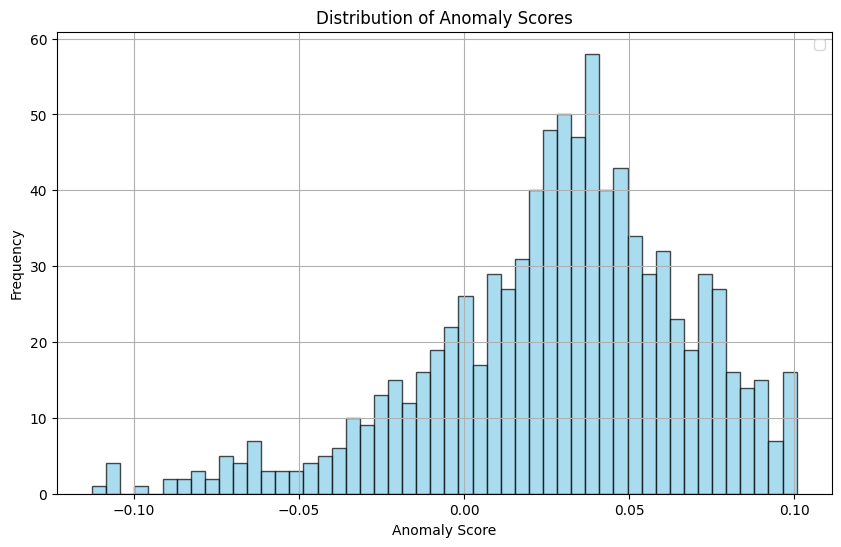

#1 Isolation Forest
              precision    recall  f1-score   support

      Normal       0.83      0.84      0.84       699
       Crash       0.38      0.36      0.37       189

    accuracy                           0.74       888
   macro avg       0.61      0.60      0.60       888
weighted avg       0.73      0.74      0.74       888
               precision    recall  f1-score   support

      Normal       0.82      0.89      0.85       175
       Crash       0.39      0.27      0.32        48

    accuracy                           0.75       223
   macro avg       0.60      0.58      0.59       223
weighted avg       0.72      0.75      0.74       223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#2 Logistic Regression
              precision    recall  f1-score   support

      Normal       0.79      1.00      0.88       699
       Crash       0.50      0.01      0.02       189

    accuracy                           0.79       888
   macro avg       0.64      0.50      0.45       888
weighted avg       0.73      0.79      0.70       888
               precision    recall  f1-score   support

      Normal       0.78      1.00      0.88       175
       Crash       0.00      0.00      0.00        48

    accuracy                           0.78       223
   macro avg       0.39      0.50      0.44       223
weighted avg       0.62      0.78      0.69       223

#3 Neural Network
              precision    recall  f1-score   support

      Normal       0.79      1.00      0.88       699
       Crash       1.00      0.04      0.07       189

    accuracy                           0.80       888
   macro avg       0.90      0.52      0.48       888
weighted avg       0.84      0.80

In [ ]:
build_models(['XAU BGNL', 'CRY', 'DXY', 'JPY', 'GBP'],"Currency and Commodities Gold")

5. **Liquidity and Money Market Indicators US0001M (1-Month USD LIBOR):** A spike may indicate tightening liquidity in money markets.
Short-Term Yields (USGG3M, USGG2YR): Sudden increases or flattening of the yield curve can predict economic downturns.
* Credit Spreads : LUMSTRUU, LUACTRUU, LF94TRUU

<ipython-input-124-6bfe661f0768>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


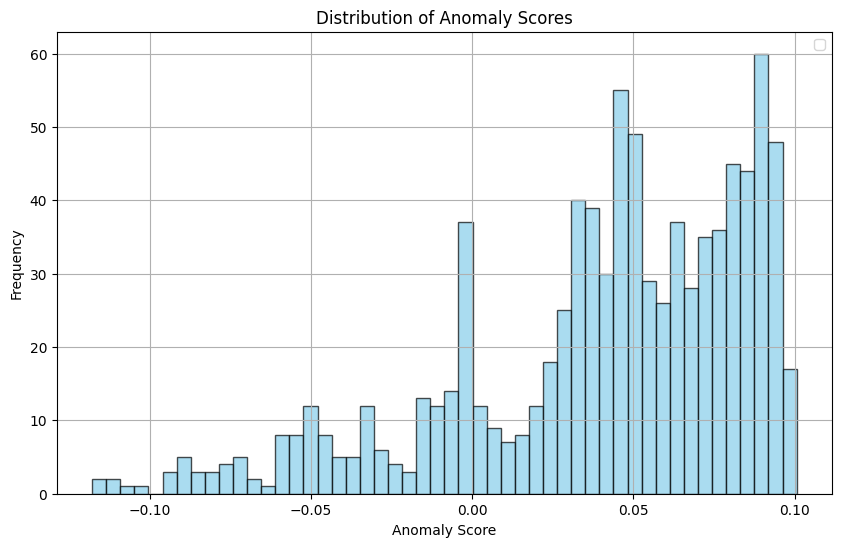

#1 Isolation Forest
              precision    recall  f1-score   support

      Normal       0.83      0.84      0.83       699
       Crash       0.37      0.35      0.36       189

    accuracy                           0.74       888
   macro avg       0.60      0.59      0.60       888
weighted avg       0.73      0.74      0.73       888
               precision    recall  f1-score   support

      Normal       0.84      0.86      0.85       175
       Crash       0.44      0.42      0.43        48

    accuracy                           0.76       223
   macro avg       0.64      0.64      0.64       223
weighted avg       0.76      0.76      0.76       223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

#2 Logistic Regression
              precision    recall  f1-score   support

      Normal       0.79      1.00      0.88       699
       Crash       0.00      0.00      0.00       189

    accuracy                           0.79       888
   macro avg       0.39      0.50      0.44       888
weighted avg       0.62      0.79      0.69       888
               precision    recall  f1-score   support

      Normal       0.78      1.00      0.88       175
       Crash       0.00      0.00      0.00        48

    accuracy                           0.78       223
   macro avg       0.39      0.50      0.44       223
weighted avg       0.62      0.78      0.69       223

#3 Neural Network
              precision    recall  f1-score   support

      Normal       0.79      1.00      0.88       699
       Crash       0.00      0.00      0.00       189

    accuracy                           0.79       888
   macro avg       0.39      0.50      0.44       888
weighted avg       0.62      0.79

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
build_models(['LUMSTRUU', 'LUACTRUU', 'LF94TRUU'], "Liquidity and Money Market Indicators")

In [ ]:
# Load Isolation Forest
iso_forest_loaded = joblib.load('/content/neural_network_model_Volatility Indicators.pkl')

# Load Logistic Regression
log_reg_loaded = joblib.load('logistic_regression_model_Volatility Indicators.pkl')

# Load Neural Network
mlp_loaded = joblib.load('neural_network_model_Volatility Indicators.pkl')

print("Models loaded successfully!")

Models loaded successfully!


In [ ]:
scaler_test = MinMaxScaler()
scaler_test.fit_transform(X[['VIX','BDIY']])

array([[0.19660048, 0.09537472],
       [0.18155836, 0.09685272],
       [0.20442238, 0.09363589],
       ...,
       [0.130716  , 0.15658146],
       [0.10860409, 0.16075465],
       [0.13583032, 0.18614154]])

In [ ]:
# Example of new data (replace this with today's data after preprocessing)
import numpy as np
today_data = np.array([[600, 1200]])  # Example values for VIX and BDIY
today_data_scaled = scaler_test.transform(today_data)  # Scale today's data

# Predict with each model
iso_forest_prediction = iso_forest_loaded.predict(today_data_scaled)
log_reg_prediction = log_reg_loaded.predict(today_data_scaled)
mlp_prediction = mlp_loaded.predict(today_data_scaled)

# Convert Isolation Forest prediction to binary
iso_forest_prediction_binary = (iso_forest_prediction == -1).astype(int)

# Combine predictions
predictions = [iso_forest_prediction_binary[0], log_reg_prediction[0], mlp_prediction[0]]

predictions

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


[0, 1, 1]

In [ ]:
# Voting
final_prediction = 1 if sum(predictions) > 1 else 0  # Majority voting

if final_prediction == 1:
    print("Prediction: Crash")
else:
    print("Prediction: No Crash")

Prediction: Crash
